In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

In [2]:
data = pd.read_parquet('data/Deepseek/DEEPSEEK_5_tables_final.parquet', engine='pyarrow')

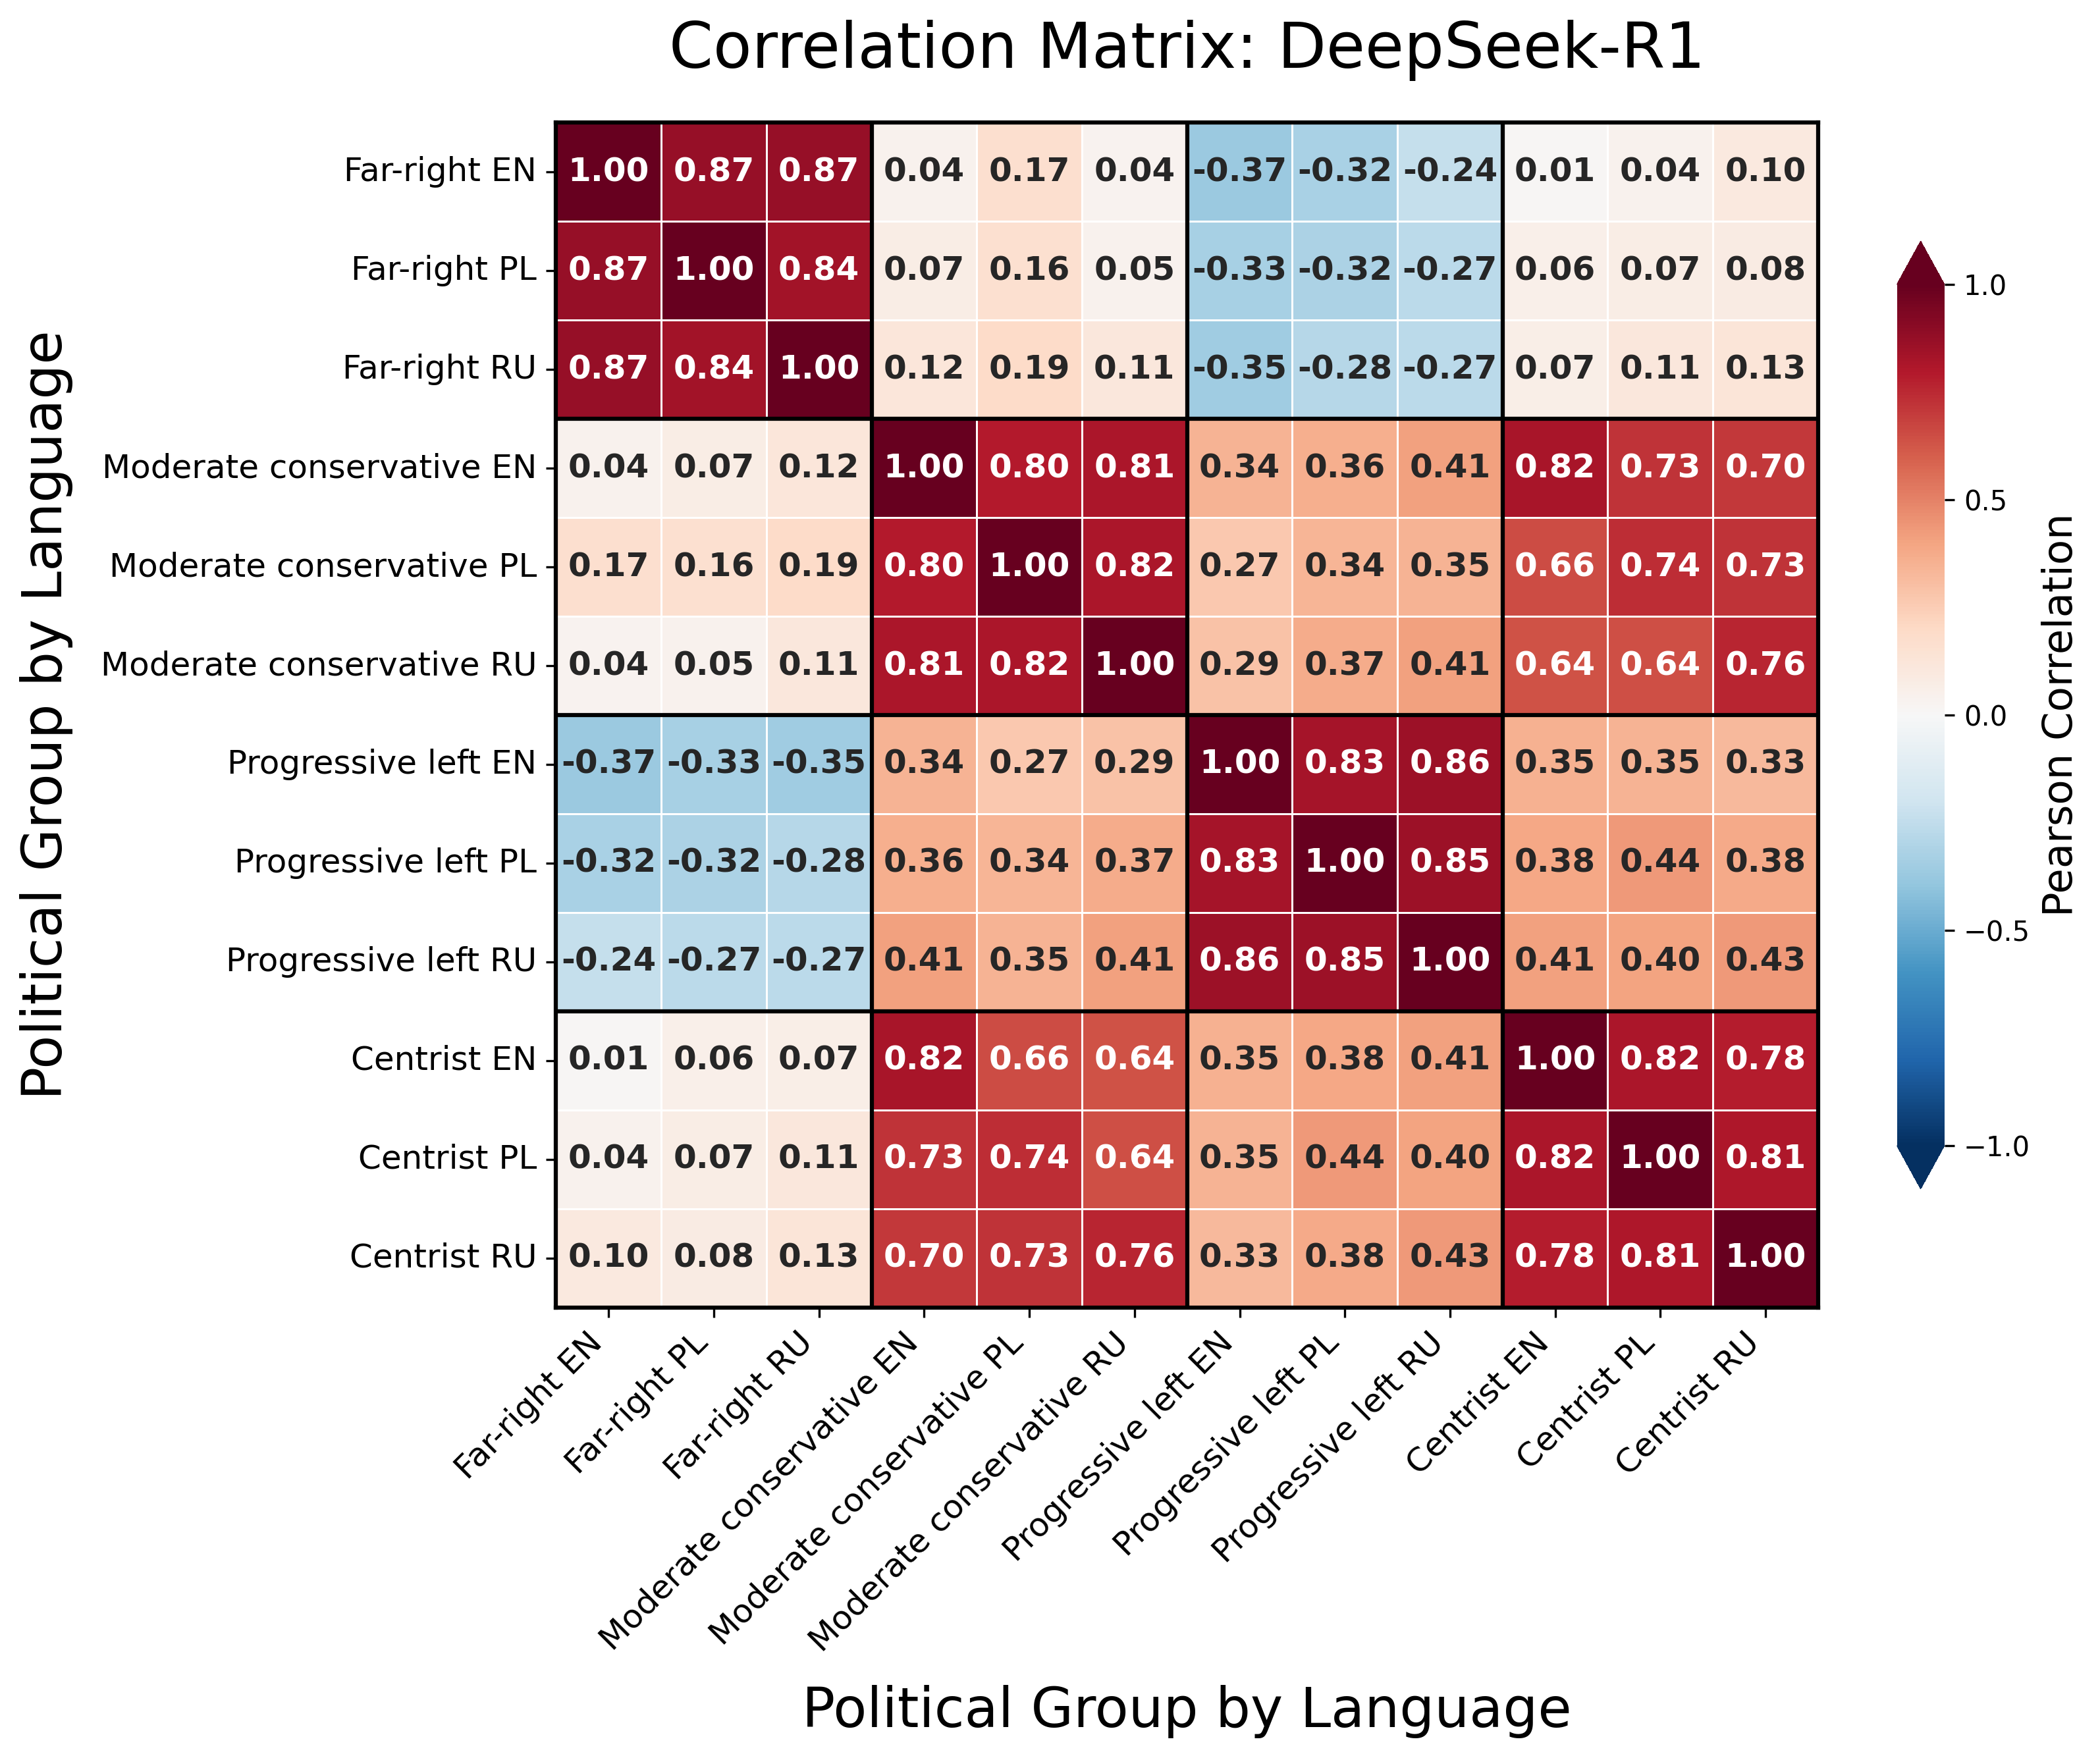

In [9]:
# Set font to a guaranteed available font
plt.rcParams['font.family'] = 'DejaVu Sans'

folder_name = "Deepseek"
plot_name = 'deepseek_r1'
target_columns_names = [col for col in data if col.startswith('Deep')]
model_name = "DeepSeek-R1"
cat_prefix = "Deepseek"



# Define display labels that will be shown in the plot
display_labels = [
    'Far-right EN', 'Far-right PL', 'Far-right RU',
    'Moderate conservative EN', 'Moderate conservative PL', 'Moderate conservative RU',
    'Progressive left EN', 'Progressive left PL', 'Progressive left RU',
    'Centrist EN', 'Centrist PL', 'Centrist RU'
]

# Create a mapping between actual columns and display labels
col_to_label = dict(zip(target_columns_names, display_labels))

# Convert None values to NaN which pandas recognizes
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[target_columns_names]

# Calculate correlation
corr = data_for_plot.corr(method='pearson')

# custom_cmap = LinearSegmentedColormap.from_list('colorblind_friendly', colors)
colors = plt.cm.RdBu_r(np.linspace(0, 1, 256))
custom_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors)


# Set up the figure with higher DPI for publication quality
plt.figure(figsize=(11, 9), dpi=300)

# Create the heatmap with improved aesthetics
ax = sns.heatmap(
    corr,
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12, "weight": "semibold"},
    linewidths=0.3,
    cbar_kws={
        "shrink": 0.8,
        "label": "Pearson Correlation",
        "ticks": [-1.0, -0.5, 0.0, 0.5, 1.0],
        "extend": "both"
    }
)

cbar = ax.collections[0].colorbar
cbar.set_label("Pearson Correlation", fontsize=15)

# Add a black border around the heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

# Define categories and languages
categories = ['Far right', 'Moderate conservative', 'Progressive left', 'Centrist']
languages = ['EN', 'PL', 'RU']

# Map data columns to their categories and languages
col_categories = {
    f'{cat_prefix}_far_right_EN_answer': ('Far right', 'EN'),
    f'{cat_prefix}_far_right_PL_answer': ('Far right', 'PL'),
    f'{cat_prefix}_far_right_RU_answer': ('Far right', 'RU'),
    f'{cat_prefix}_mod_cons_EN_answer': ('Moderate conservative', 'EN'),
    f'{cat_prefix}_mod_cons_PL_answer': ('Moderate conservative', 'PL'),
    f'{cat_prefix}_mod_cons_RU_answer': ('Moderate conservative', 'RU'),
    f'{cat_prefix}_prog_left_EN_answer': ('Progressive left', 'EN'),
    f'{cat_prefix}_prog_left_PL_answer': ('Progressive left', 'PL'),
    f'{cat_prefix}_prog_left_RU_answer': ('Progressive left', 'RU'),
    f'{cat_prefix}_centrist_EN_answer': ('Centrist', 'EN'),
    f'{cat_prefix}_centrist_PL_answer': ('Centrist', 'PL'),
    f'{cat_prefix}_centrist_RU_answer': ('Centrist', 'RU')
}



# Group columns by category
cat_indices = {}
for i, col in enumerate(target_columns_names):
    cat = col_categories[col][0]
    if cat not in cat_indices:
        cat_indices[cat] = []
    cat_indices[cat].append(i)

categories = {
    'Far-right': [f'{cat_prefix}_far_right_EN_answer', f'{cat_prefix}_far_right_PL_answer', f'{cat_prefix}_far_right_RU_answer'],
    'Moderate Conservative': [f'{cat_prefix}_mod_cons_EN_answer', f'{cat_prefix}_mod_cons_PL_answer', f'{cat_prefix}_mod_cons_RU_answer'],
    'Progressive Left': [f'{cat_prefix}_prog_left_EN_answer', f'{cat_prefix}_prog_left_PL_answer', f'{cat_prefix}_prog_left_RU_answer'],
    'Centrist': [f'{cat_prefix}_centrist_EN_answer', f'{cat_prefix}_centrist_PL_answer', f'{cat_prefix}_centrist_RU_answer']
}
# Add separators between ideological groups
idx = 0
for category, cols in categories.items():
    idx += len(cols)
    if idx < len(target_columns_names):
        plt.axhline(y=idx, color='black', linestyle='-', linewidth=1.5)
        plt.axvline(x=idx, color='black', linestyle='-', linewidth=1.5)
categories = ['Far right', 'Moderate conservative', 'Progressive left', 'Centrist']
# Use display labels for tick labels
ax.set_xticklabels([col_to_label[col] for col in target_columns_names], rotation=45, ha='right', fontsize=12)
ax.set_yticklabels([col_to_label[col] for col in target_columns_names], fontsize=12)

# Add title and labels
plt.title(f'Correlation Matrix: {model_name}', fontsize=23, pad=20)
plt.xlabel('Political Group by Language', fontsize=20, labelpad=10)
plt.ylabel('Political Group by Language', fontsize=20, labelpad=10)


# Adjust layout and save
plt.tight_layout()
# plt.savefig(f'data/{folder_name}/correlation_plot_{plot_name}_r1.png', dpi=300, bbox_inches='tight')
plt.savefig(f"data/{folder_name}/correlation_plot_{plot_name}.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()